In [1]:
from sklearn.datasets import make_blobs
from unsupervised.kmeans import KMeans, K_Means
from unsupervised.k_medoids import K_Medoids
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import cm


In [2]:
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)

## Plot the resulting dataset.

[Text(0.5, 1.0, 'Scatterplot for data generated from make_blobs')]

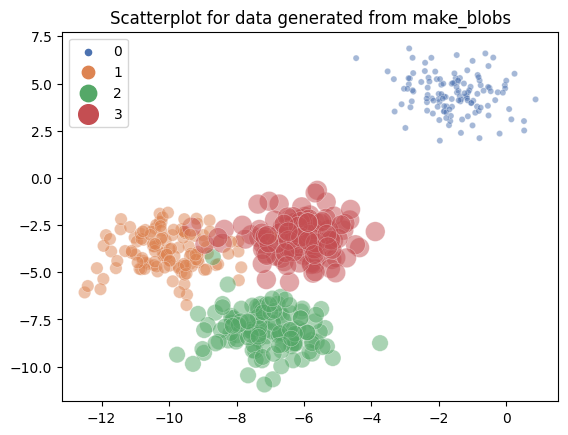

In [3]:
sns.scatterplot(x=X[:,0], y = X[:,1], hue = y, alpha = 0.5, palette='deep', size=y,
    sizes=(20, 200), legend="full", hue_norm=(0, 7)).set(title='Scatterplot for data generated from make_blobs')

## Kmeans

In [4]:
# Initialize KMeans
kmeans = KMeans(n_clusters=4)

# fit the data & predict cluster labels
kmeans.fit(X)
predicted_labels = kmeans.predict(X)

[Text(0.5, 1.0, 'Scatterplot for data generated from make_blobs')]

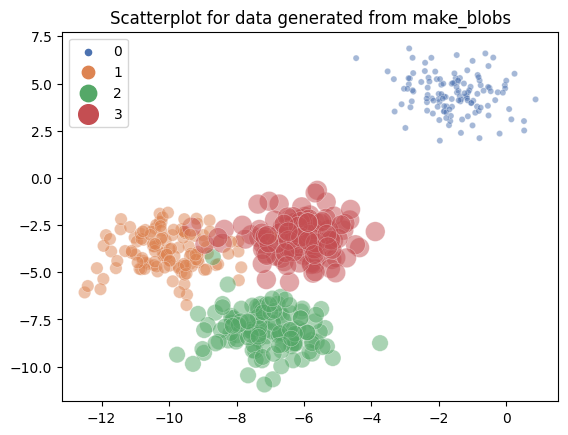

In [5]:
sns.scatterplot(x=X[:,0], y = X[:,1], hue = y, alpha = 0.5, palette='deep', size=y,
    sizes=(20, 200), legend="full", hue_norm=(0, 7)).set(title='Scatterplot for data generated from make_blobs')

In the scatter plot we can see 4 groups, 3 very close to each other and the fourth one is far away

In [6]:
#https://stackoverflow.com/questions/51729851/distance-between-clusters-kmeans-sklearn-python
distances=kmeans._calc_distances(X)
tri_dists = distances[np.triu_indices(4, 1)]
max_dist, avg_dist, min_dist = tri_dists.max(), tri_dists.mean(), tri_dists.min()
print('max_dist {}, avg_dist {}, min_dist {}'.format(max_dist, avg_dist, min_dist))

max_dist 16.0345346870353, avg_dist 6.438560546741665, min_dist 1.8182457530090606


#### For both k-means and k-medoids (your implementations), calculate the silhouette plots and coefficients for each run, iterating K from 1 to 5 clusters.

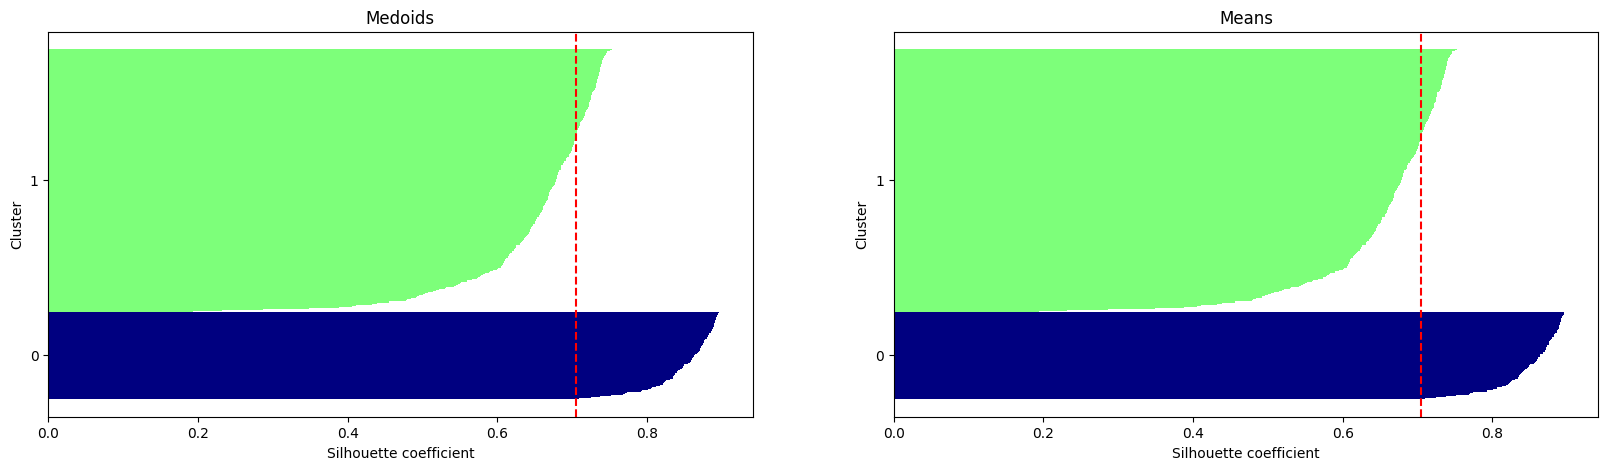

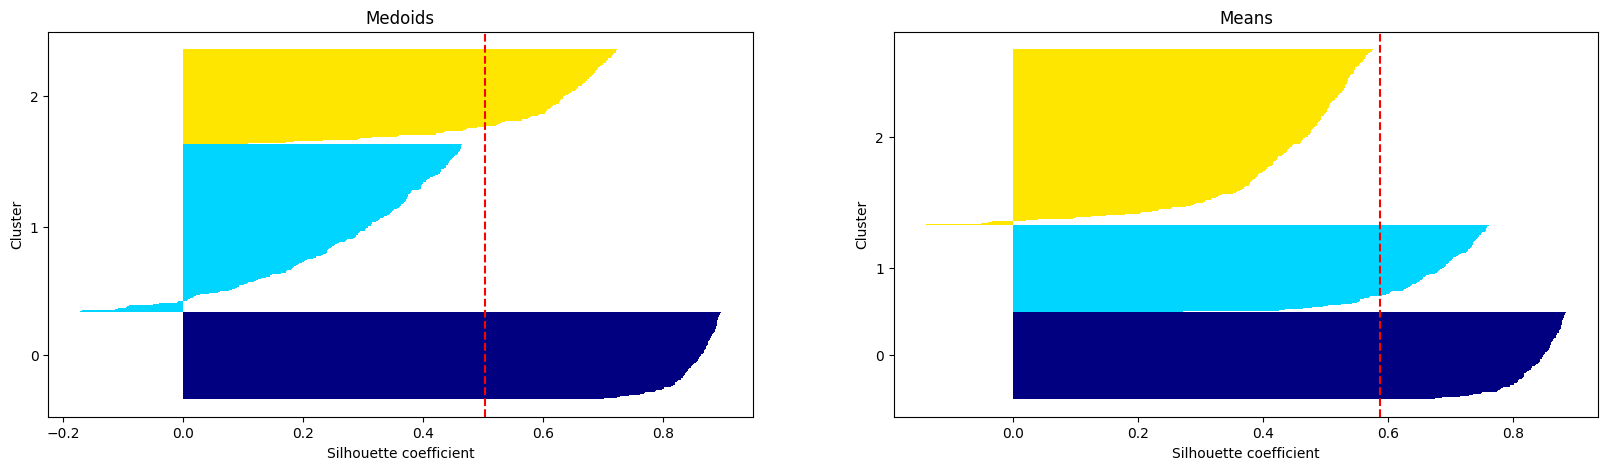

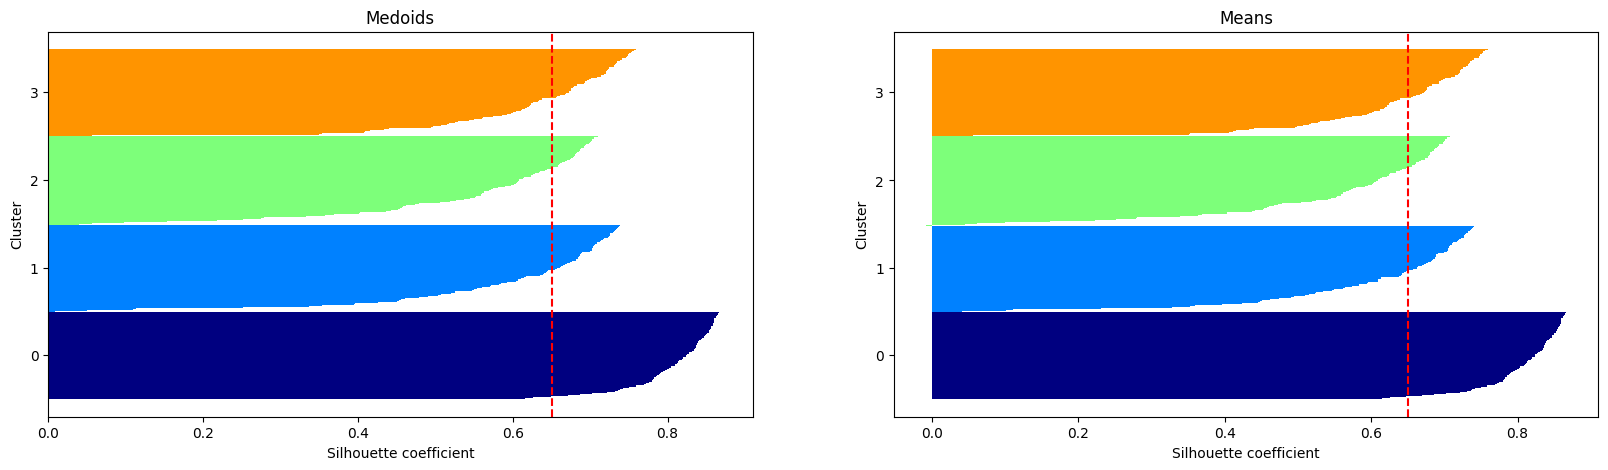

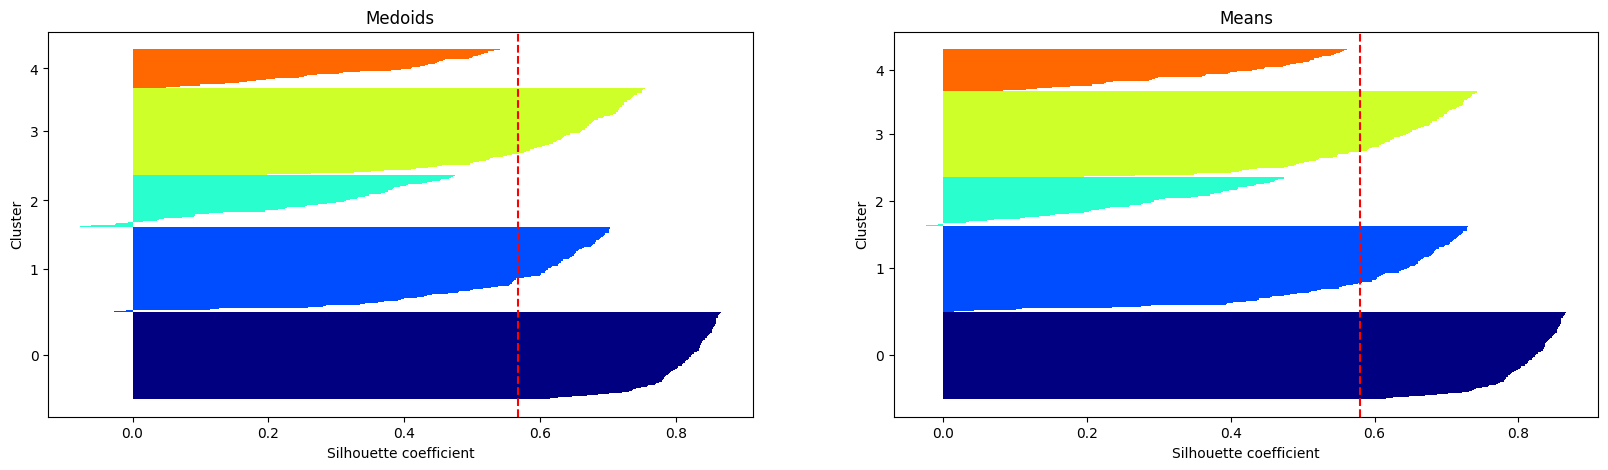

In [7]:
for n_clusters in range(2,6):
    fig, axs = plt.subplots(1, 2, figsize=(20, 5))
    K_medoids2=K_Medoids()
    labels=K_medoids2.fit_transform(X=X,K=n_clusters,max_iters=1000)
    silhouette_vals = silhouette_samples(X, labels, metric='euclidean')
    silhouette_avg = silhouette_score(X, labels, metric='euclidean')
    y_lower, y_upper = 0, 0
    yticks = []
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        axs[0].barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1.0,
                edgecolor='none', color=color)
        yticks.append((y_lower + y_upper) / 2.)
        y_lower += len(cluster_silhouette_vals)
    axs[0].axvline(silhouette_avg, color="red", linestyle="--")
    axs[0].set_yticks(yticks,np.unique(labels))
    axs[0].set_ylabel('Cluster')
    axs[0].set_xlabel('Silhouette coefficient')
    axs[0].set_title('Medoids')

    K_means=K_Means()
    labels=K_means.fit_transform(X=X,K=n_clusters,max_iters=1000)
    silhouette_vals = silhouette_samples(X, labels, metric='euclidean')
    silhouette_avg = silhouette_score(X, labels, metric='euclidean')
    y_lower, y_upper = 0, 0
    yticks = []
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        axs[1].barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1.0,
                edgecolor='none', color=color)
        yticks.append((y_lower + y_upper) / 2.)
        y_lower += len(cluster_silhouette_vals)
    axs[1].axvline(silhouette_avg, color="red", linestyle="--")
    axs[1].set_yticks(yticks,np.unique(labels))
    axs[1].set_ylabel('Cluster')
    axs[1].set_xlabel('Silhouette coefficient')
    axs[1].set_title('Means')